In [1]:
# 安裝此專案縮需套件
!pip install -r requirements.txt

In [11]:
# 連線到 raspberry 
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute("SELECT version();")
db_version = cursor.fetchone()
print(db_version)
cursor.close()
connect.close()



('PostgreSQL 15.8 (Debian 15.8-0+deb12u1) on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)


In [17]:
cont ='''
SELECT version();
SELECT version();
SELECT version();
'''
conts = cont.split(';')
conts = conts[:-1]
print(conts)

['\nSELECT version()', '\nSELECT version()', '\nSELECT version()']


In [22]:
# 連線到 raspberry 
# 並獲取全部的 sql 命令回應 = cursor.fetchall()
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute('''SELECT * FROM stations
                  WHERE CAST(stationcode AS INTEGER) < 1000;''')
db_version = cursor.fetchall()
print(db_version)
cursor.close()
connect.close()



[(1, '900', '基隆', '基隆', '基隆市仁愛區港西街5號', '02-24263743', '25.13411 121.73997', True), (2, '910', '三坑', '三坑', '基隆市仁愛區德厚里龍安街 206 號', '02-24230289', '25.12305 121.74202', True), (3, '920', '八堵', '八堵', '基隆市暖暖區八南里八堵路 142 號', '02-24560841', '25.10843 121.72898', True), (4, '930', '七堵', '七堵', '基隆市七堵區長興里東新街 2 號', '02-24553426', '25.09294 121.71415', True), (5, '940', '百福', '百福', '基隆市七堵區堵南里明德三路 1 之 1 號', '02-24528372', '25.07795 121.69379', False), (6, '950', '五堵', '五堵', '新北市汐止區長安里長安路 17 號', '02-86476200', '25.07784 121.66764', True), (7, '960', '汐止', '汐止', '新北市汐止區信望里信義路 1 號', '02-26415096', '25.06814 121.66121', True), (8, '970', '汐科', '汐科', '新北市汐止區大同里大同路二段 182 號', '02-26499817#8730', '25.06261 121.64659', False), (9, '980', '南港', '南港', '臺北市南港區南港里南港路一段 313 號 B2', '02-27838645', '25.05348 121.60706', True), (10, '990', '松山', '松山', '臺北市信義區松山路 11 號B1', '02-27673819', '25.04921 121.57841', True)]


In [40]:
# 連線到 raspberry 
# 並獲取全部的 sql 命令回應 = cursor.fetchall()
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute(
'''
SELECT staCode AS 站號, stationName AS 站名, SUM(gateInComingCnt) 進站人數
FROM station_in_out io join stations s_name ON io.staCode = s_name.stationCode
WHERE EXTRACT(YEAR FROM date) = 2022
GROUP BY stationName, staCode
ORDER BY CAST(staCode AS INTEGER)ASC;
''')
rows = cursor.fetchall()
#print(rows) # rows 為 list, 裡面放 () 為 tuple無法更改
#for row in rows:
#    print(row) # tuple 格式, 無法更改
print(type(row))
print(type(rows))
cursor.close()
connect.close()


<class 'tuple'>
<class 'list'>


In [85]:
# 連線到 raspberry 
# 並獲取全部的 sql 命令回應 = cursor.fetchall()
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute(
'''
SELECT staCode AS 站號, stationName AS 站名, SUM(gateInComingCnt) 進站人數
FROM station_in_out io join stations s_name ON io.staCode = s_name.stationCode
WHERE EXTRACT(YEAR FROM date) = 2022
GROUP BY stationName, staCode
ORDER BY CAST(staCode AS INTEGER)ASC;
'''
)
names = [] # 建立空 list
rows = cursor.fetchall()
for row in rows:
    names.append(row[1])
print(names)

cursor.close()
connect.close()


['基隆', '三坑', '八堵', '七堵', '百福', '五堵', '汐止', '汐科', '南港', '松山', '臺北', '萬華', '板橋', '浮洲', '樹林', '南樹林', '山佳', '鶯歌', '桃園', '內壢', '中壢', '埔心', '楊梅', '富岡', '新富', '北湖', '湖口', '新豐', '竹北', '北新竹', '千甲', '新莊', '竹中', '六家', '上員', '榮華', '竹東', '橫山', '九讚頭', '合興', '富貴', '內灣', '新竹', '三姓橋', '香山', '崎頂', '竹南', '談文', '大山', '後龍', '龍港', '白沙屯', '新埔', '通霄', '苑裡', '日南', '大甲', '臺中港', '清水', '沙鹿', '龍井', '大肚', '追分', '造橋', '豐富', '苗栗', '南勢', '銅鑼', '三義', '泰安', '后里', '豐原', '栗林', '潭子', '頭家厝', '松竹', '太原', '精武', '臺中', '五權', '大慶', '烏日', '新烏日', '成功', '彰化', '花壇', '大村', '員林', '永靖', '社頭', '田中', '二水', '源泉', '濁水', '龍泉', '集集', '水里', '車埕', '林內', '石榴', '斗六', '斗南', '石龜', '大林', '民雄', '嘉北', '嘉義', '水上', '南靖', '後壁', '新營', '柳營', '林鳳營', '隆田', '拔林', '善化', '南科', '新市', '永康', '大橋', '臺南', '保安', '仁德', '中洲', '長榮大學', '沙崙', '大湖', '路竹', '岡山', '橋頭', '楠梓', '新左營', '左營', '內惟', '美術館', '鼓山', '三塊厝', '高雄', '民族', '科工館', '正義', '鳳山', '後庄', '九曲堂', '六塊厝', '屏東', '歸來', '麟洛', '西勢', '竹田', '潮州', '崁頂', '南州', '鎮安', '林邊', '佳冬', '東海', '枋寮', '加祿', '內獅', '枋山', '大武', '瀧溪', '金崙'

# 資料結構 [容器]
https://github.com/roberthsu2003/python/tree/master/python%E5%85%A7%E5%BB%BA%E7%9A%84%E8%B3%87%E6%96%99%E7%B5%90%E6%A7%8B


## Tuple
 - ()
 - 可以儲存多種數值
 - 不可以修改, 新增, 刪除元素
 - 序列, 串列資料(for in操作)

In [42]:
#建立tuple
tu1 = (1, 3, 5, 7, 9)
for value in tu1:
    print(value)

1
3
5
7
9


In [43]:
type(tu1)

tuple

## List
 - []
 - 可以儲存多種數值
 - 可以修改, 新增, 刪除元素
 - 序列, 串列資料(for in操作)

In [46]:
#建立list
tu1 = [1, 3, 5, 7, 9]
for value in tu1:
    print(value)

1
3
5
7
9


In [47]:
type(tu1)

list

In [71]:
#建立空 list
li2 = []
type(li2)

list

In [52]:
li2 = list[]

SyntaxError: invalid syntax (4140381453.py, line 1)

### 自己查說明書
https://docs.python.org/zh-tw/3.10/tutorial/introduction.html#lists

https://docs.python.org/zh-tw/3.10/tutorial/datastructures.html#using-lists-as-stacks

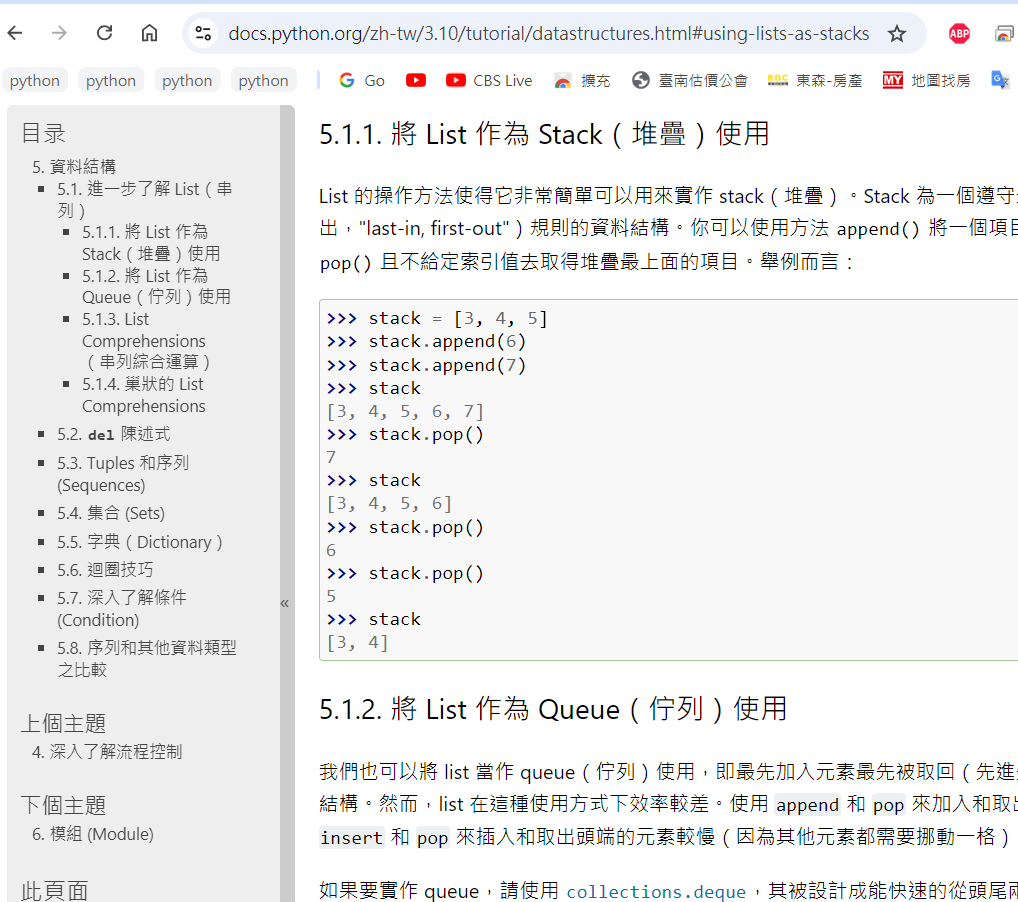

### Dict 字典
 - {}
 - mapping 資料 (key,value)
 - key不得重複
 - 可增加,刪除

In [63]:
codes = {
    'tw':'Taiwan',
    'jp':'Japan',
}
codes

{'tw': 'Taiwan', 'jp': 'Japan'}

In [64]:
codes['tw']

'Taiwan'

In [67]:
codes['hk']='Hong Kong' # 增加

In [68]:
codes

{'tw': 'Taiwan', 'jp': 'Japan', 'hk': 'Hong Kong'}

In [69]:
# 建立空的 Dict
dict1={}
dict1

{}

In [72]:
for key in codes:
    print(key) # 印出key

tw
jp
hk


In [75]:
for key in codes:
    print(codes[key]) # 再把key 餵到 dict 印出 value

Taiwan
Japan
Hong Kong


In [78]:
for index,key in enumerate(codes):
    print(index,key,codes[key])

0 tw Taiwan
1 jp Japan
2 hk Hong Kong


In [86]:
mapping = {}
for row in rows:
    # print(row)
    mapping[row[1]] = row[0] # 建立 Dict 對照表
print(mapping)

{'基隆': '900', '三坑': '910', '八堵': '920', '七堵': '930', '百福': '940', '五堵': '950', '汐止': '960', '汐科': '970', '南港': '980', '松山': '990', '臺北': '1000', '萬華': '1010', '板橋': '1020', '浮洲': '1030', '樹林': '1040', '南樹林': '1050', '山佳': '1060', '鶯歌': '1070', '桃園': '1080', '內壢': '1090', '中壢': '1100', '埔心': '1110', '楊梅': '1120', '富岡': '1130', '新富': '1140', '北湖': '1150', '湖口': '1160', '新豐': '1170', '竹北': '1180', '北新竹': '1190', '千甲': '1191', '新莊': '1192', '竹中': '1193', '六家': '1194', '上員': '1201', '榮華': '1202', '竹東': '1203', '橫山': '1204', '九讚頭': '1205', '合興': '1206', '富貴': '1207', '內灣': '1208', '新竹': '1210', '三姓橋': '1220', '香山': '1230', '崎頂': '1240', '竹南': '1250', '談文': '2110', '大山': '2120', '後龍': '2130', '龍港': '2140', '白沙屯': '2150', '新埔': '2160', '通霄': '2170', '苑裡': '2180', '日南': '2190', '大甲': '2200', '臺中港': '2210', '清水': '2220', '沙鹿': '2230', '龍井': '2240', '大肚': '2250', '追分': '2260', '造橋': '3140', '豐富': '3150', '苗栗': '3160', '南勢': '3170', '銅鑼': '3180', '三義': '3190', '泰安': '3210', '后里': '3220', '豐原': '32

In [82]:
mapping['八堵']

'920'

In [88]:
for (key,value) in mapping.items(): # Dict 用 items 導出 key & Value
    print(key,value)


基隆 900
三坑 910
八堵 920
七堵 930
百福 940
五堵 950
汐止 960
汐科 970
南港 980
松山 990
臺北 1000
萬華 1010
板橋 1020
浮洲 1030
樹林 1040
南樹林 1050
山佳 1060
鶯歌 1070
桃園 1080
內壢 1090
中壢 1100
埔心 1110
楊梅 1120
富岡 1130
新富 1140
北湖 1150
湖口 1160
新豐 1170
竹北 1180
北新竹 1190
千甲 1191
新莊 1192
竹中 1193
六家 1194
上員 1201
榮華 1202
竹東 1203
橫山 1204
九讚頭 1205
合興 1206
富貴 1207
內灣 1208
新竹 1210
三姓橋 1220
香山 1230
崎頂 1240
竹南 1250
談文 2110
大山 2120
後龍 2130
龍港 2140
白沙屯 2150
新埔 2160
通霄 2170
苑裡 2180
日南 2190
大甲 2200
臺中港 2210
清水 2220
沙鹿 2230
龍井 2240
大肚 2250
追分 2260
造橋 3140
豐富 3150
苗栗 3160
南勢 3170
銅鑼 3180
三義 3190
泰安 3210
后里 3220
豐原 3230
栗林 3240
潭子 3250
頭家厝 3260
松竹 3270
太原 3280
精武 3290
臺中 3300
五權 3310
大慶 3320
烏日 3330
新烏日 3340
成功 3350
彰化 3360
花壇 3370
大村 3380
員林 3390
永靖 3400
社頭 3410
田中 3420
二水 3430
源泉 3431
濁水 3432
龍泉 3433
集集 3434
水里 3435
車埕 3436
林內 3450
石榴 3460
斗六 3470
斗南 3480
石龜 3490
大林 4050
民雄 4060
嘉北 4070
嘉義 4080
水上 4090
南靖 4100
後壁 4110
新營 4120
柳營 4130
林鳳營 4140
隆田 4150
拔林 4160
善化 4170
南科 4180
新市 4190
永康 4200
大橋 4210
臺南 4220
保安 4250
仁德 4260
中洲 4270
長榮大學 4271

### 安裝套件 streamlit   --> 簡單網頁呈現
https://github.com/roberthsu2003/pythonStreamlit/tree/main/%E5%BF%AB%E9%80%9F%E5%85%A5%E9%96%80

官網
https://docs.streamlit.io/get-started/installation


安裝好後, 照教學輸入streamlit hello

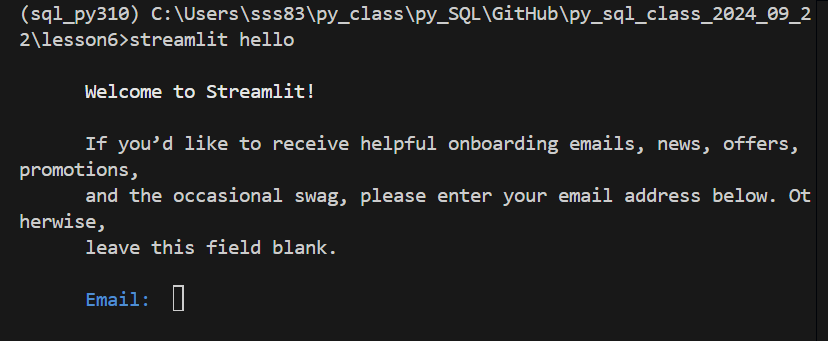

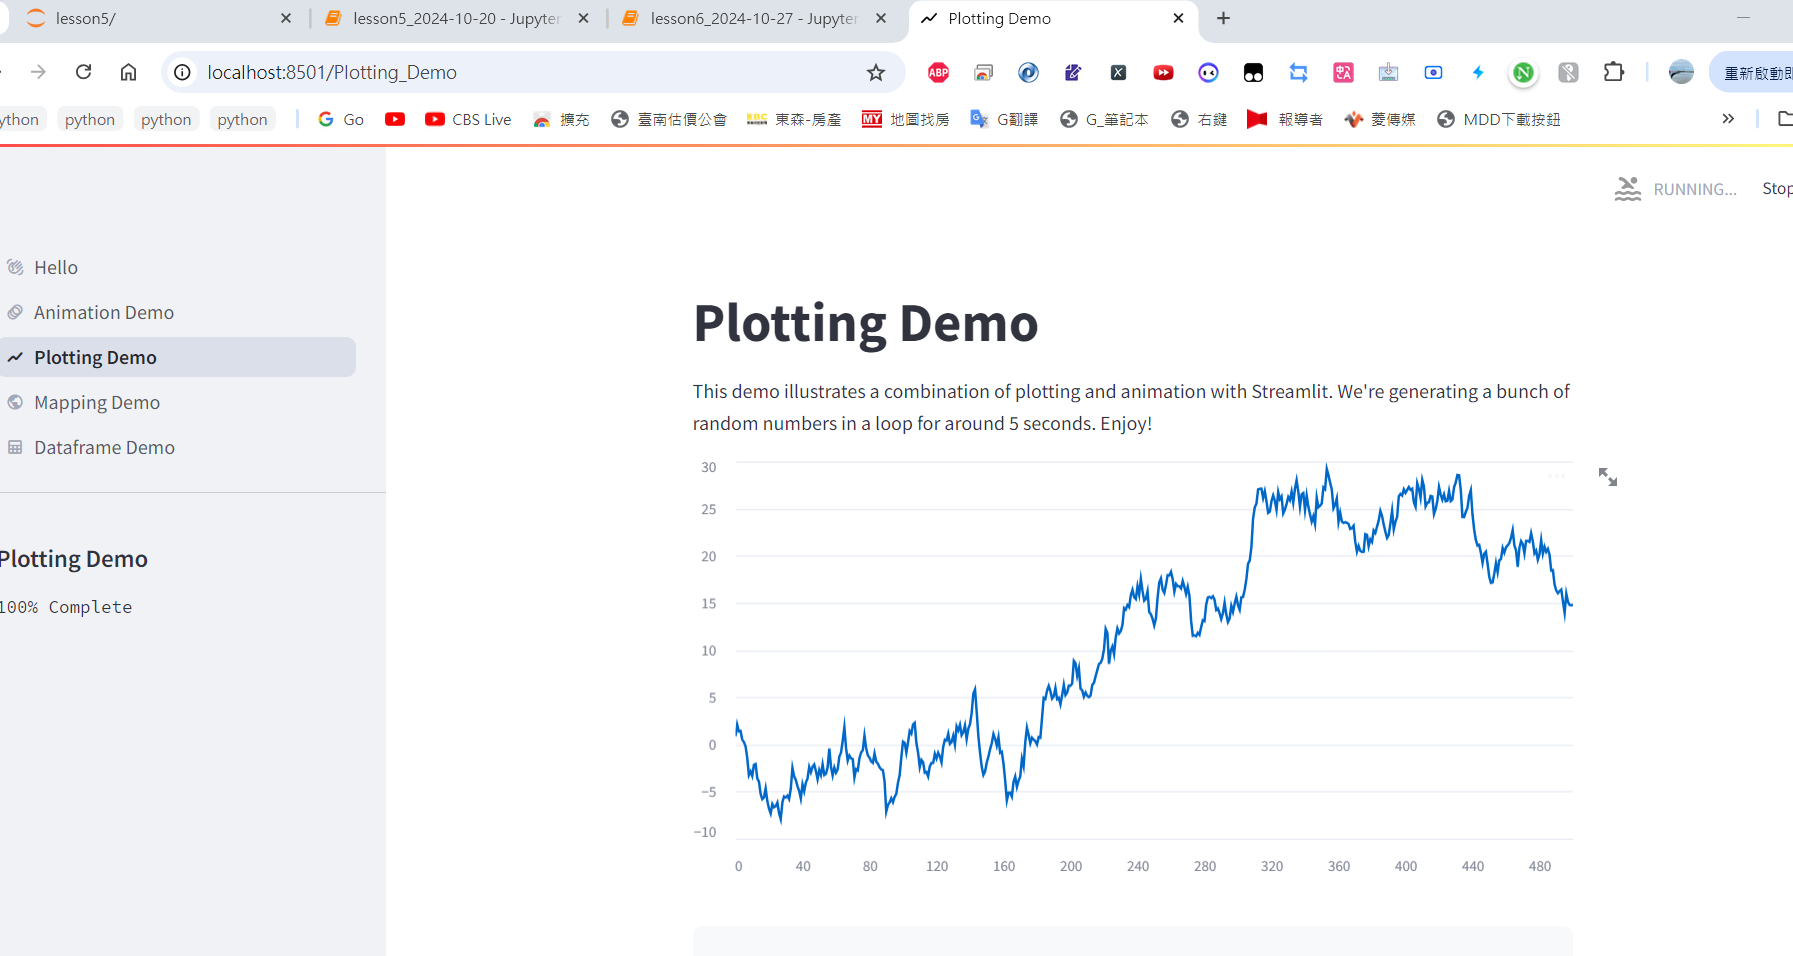

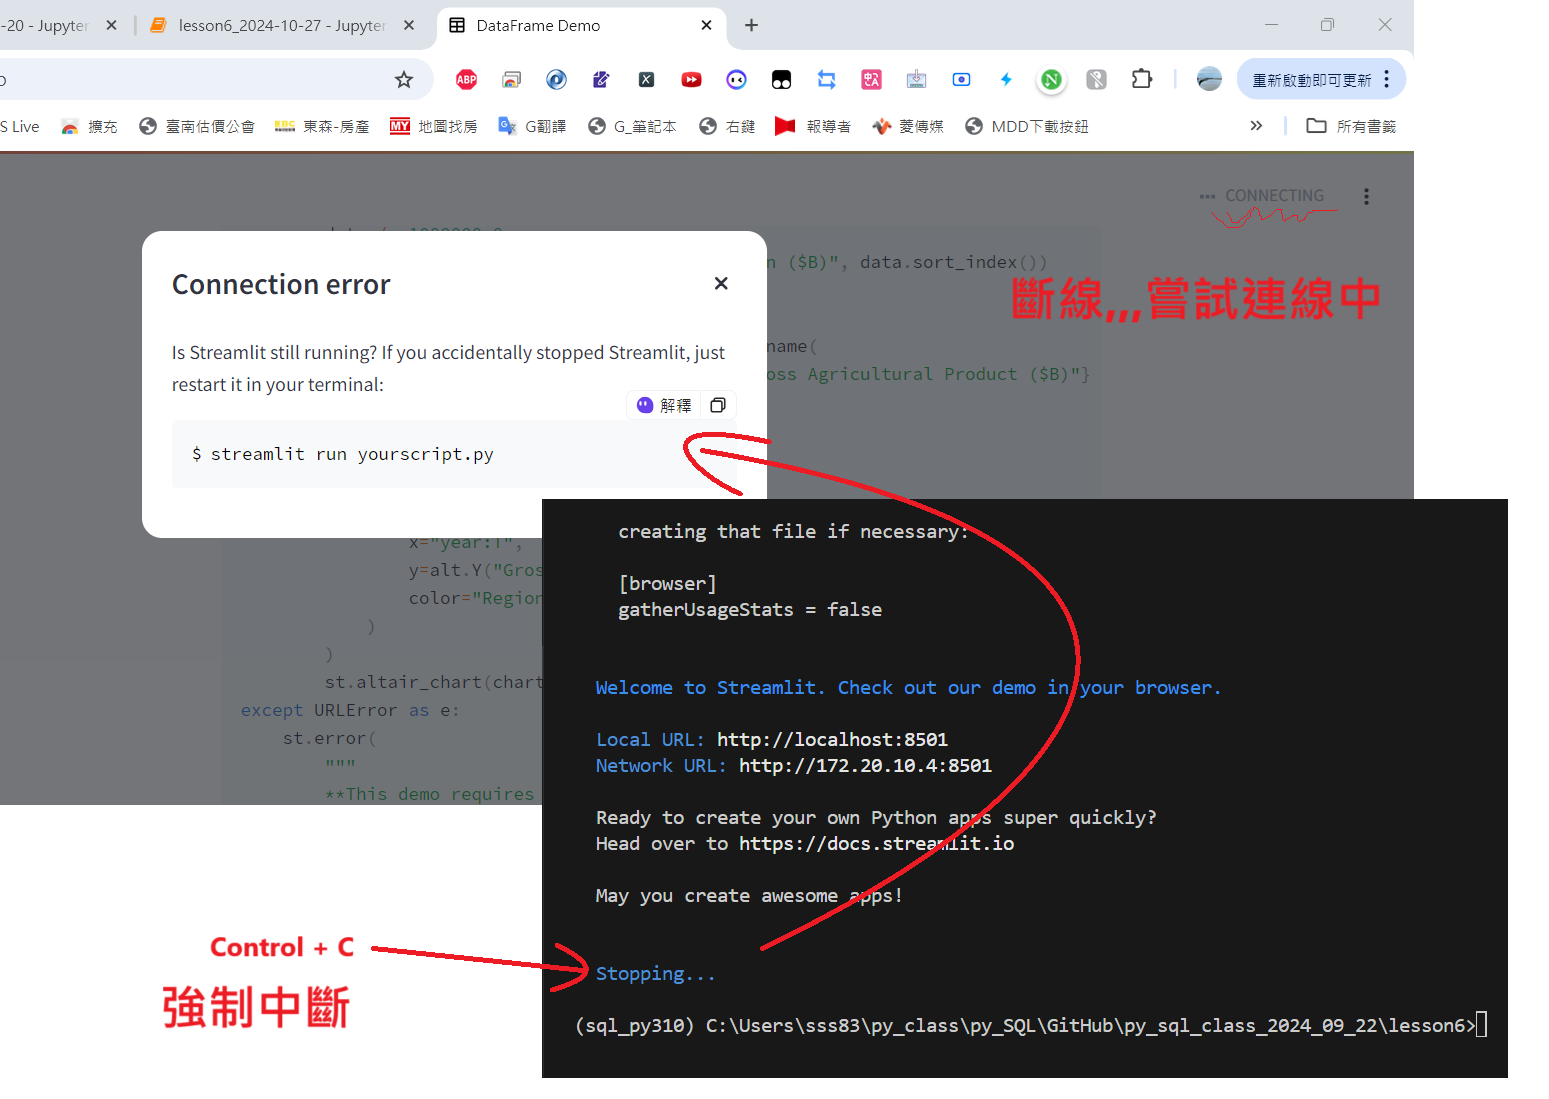

```python
import streamlit as st

st.write('Hello! **Python**!')
```

然後在 cmd 輸入  streamlit run [py 檔名]

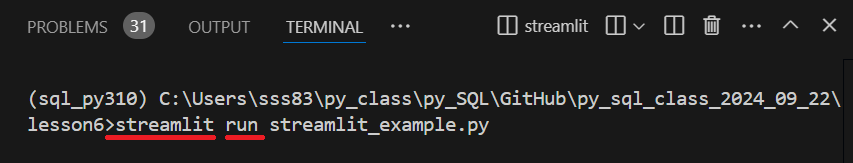

In [89]:
# 連線到 raspberry 
# 並獲取全部的 sql 命令回應 = cursor.fetchall()
import streamlit as st
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute('''SELECT * FROM stations;''')

rows = cursor.fetchall()
names = []
for row in rows:
    names.append(row[2])

cursor.close()
connect.close()

st.write(names)

2024-10-27 14:48:27.511 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 14:48:28.093 
  command:

    streamlit run C:\Users\sss83\.conda\envs\sql_py310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-27 14:48:28.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## 注意 streamlit 要用 streamlit run <檔名> 執行, 不能再 jupyter 運行

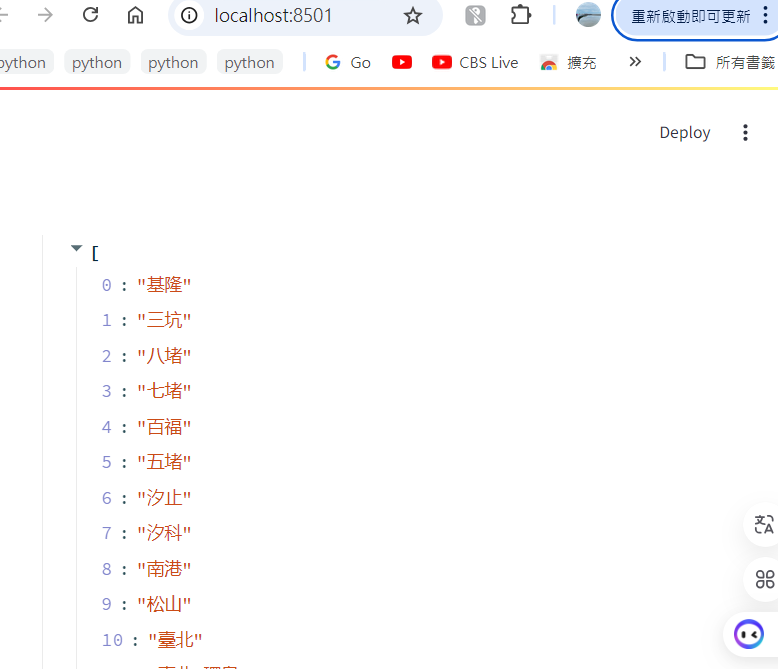

In [90]:
import psycopg2
connect = psycopg2.connect( host='192.168.0.252',
                            database='mydatabase_a29',
                            user='a29',
                            password='raspberry',
                            port='5432')
cursor = connect.cursor()
cursor.execute('''SELECT * FROM stations;''')

rows = cursor.fetchall()
names = []
for row in rows:
    names.append(row[2])
print(rows)
cursor.close()
connect.close()

[(1, '900', '基隆', '基隆', '基隆市仁愛區港西街5號', '02-24263743', '25.13411 121.73997', True), (2, '910', '三坑', '三坑', '基隆市仁愛區德厚里龍安街 206 號', '02-24230289', '25.12305 121.74202', True), (3, '920', '八堵', '八堵', '基隆市暖暖區八南里八堵路 142 號', '02-24560841', '25.10843 121.72898', True), (4, '930', '七堵', '七堵', '基隆市七堵區長興里東新街 2 號', '02-24553426', '25.09294 121.71415', True), (5, '940', '百福', '百福', '基隆市七堵區堵南里明德三路 1 之 1 號', '02-24528372', '25.07795 121.69379', False), (6, '950', '五堵', '五堵', '新北市汐止區長安里長安路 17 號', '02-86476200', '25.07784 121.66764', True), (7, '960', '汐止', '汐止', '新北市汐止區信望里信義路 1 號', '02-26415096', '25.06814 121.66121', True), (8, '970', '汐科', '汐科', '新北市汐止區大同里大同路二段 182 號', '02-26499817#8730', '25.06261 121.64659', False), (9, '980', '南港', '南港', '臺北市南港區南港里南港路一段 313 號 B2', '02-27838645', '25.05348 121.60706', True), (10, '990', '松山', '松山', '臺北市信義區松山路 11 號B1', '02-27673819', '25.04921 121.57841', True), (11, '1000', '臺北', '臺北', '臺北市中正區黎明里北平西路 3 號', '02-23713558', '25.04771 121.51784', False), (12, '1001', '

In [ ]:
https://github.com/roberthsu2003/python-SQLite-MySQL/tree/master/postgresSQL

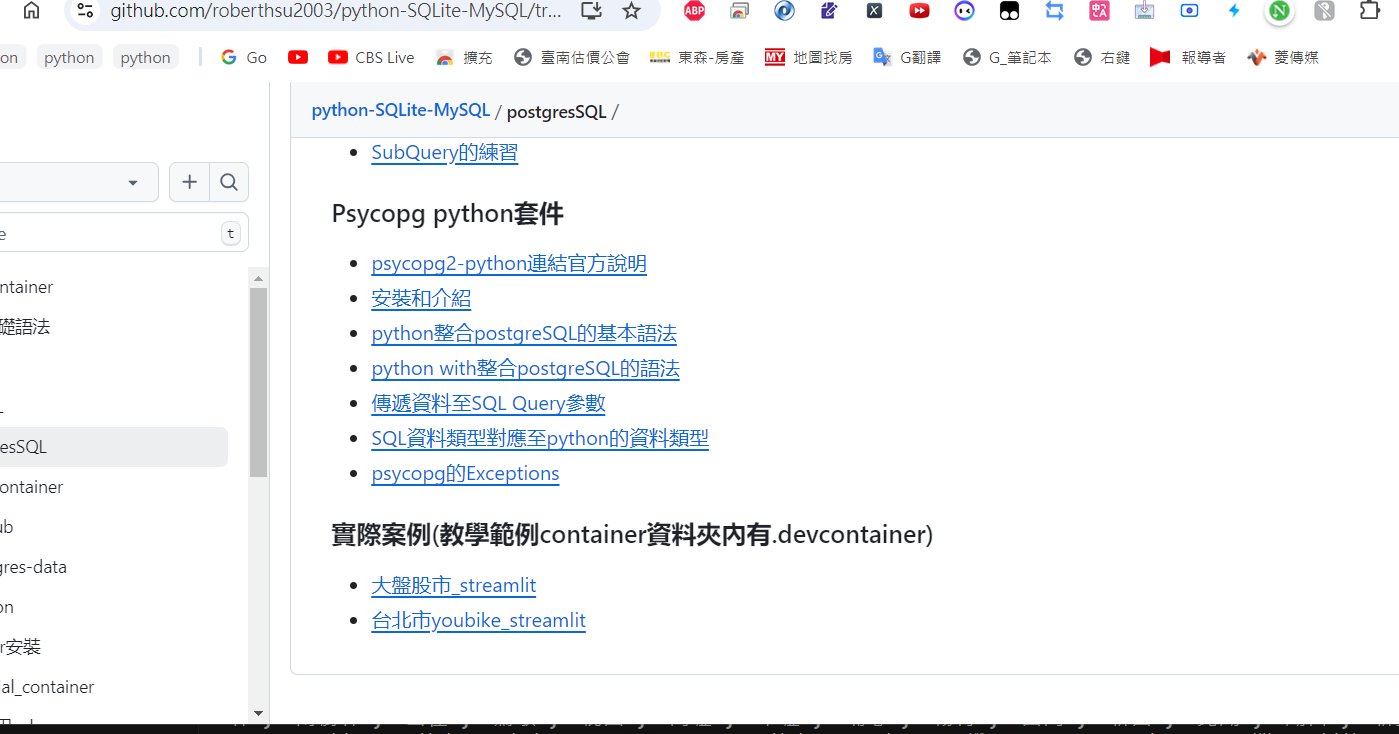m

https://github.com/roberthsu2003/python-SQLite-MySQL/tree/master/postgresSQL/tutorial_container/%E7%AF%84%E4%BE%8B/1stock_market
    

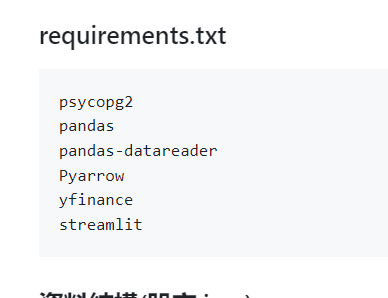